In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [30]:
aug0117 = pickle.load(open('/ocean/vdo/MIDOSS/01aug17.pkl', 'rb'))

In [31]:
tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(aug0117['tp_uwinds'], aug0117['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(aug0117['sb_uwinds'], aug0117['sb_vwinds'])

In [32]:
tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(aug0117['tp_ucurr'], aug0117['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(aug0117['sb_ucurr'], aug0117['sb_vcurr'])

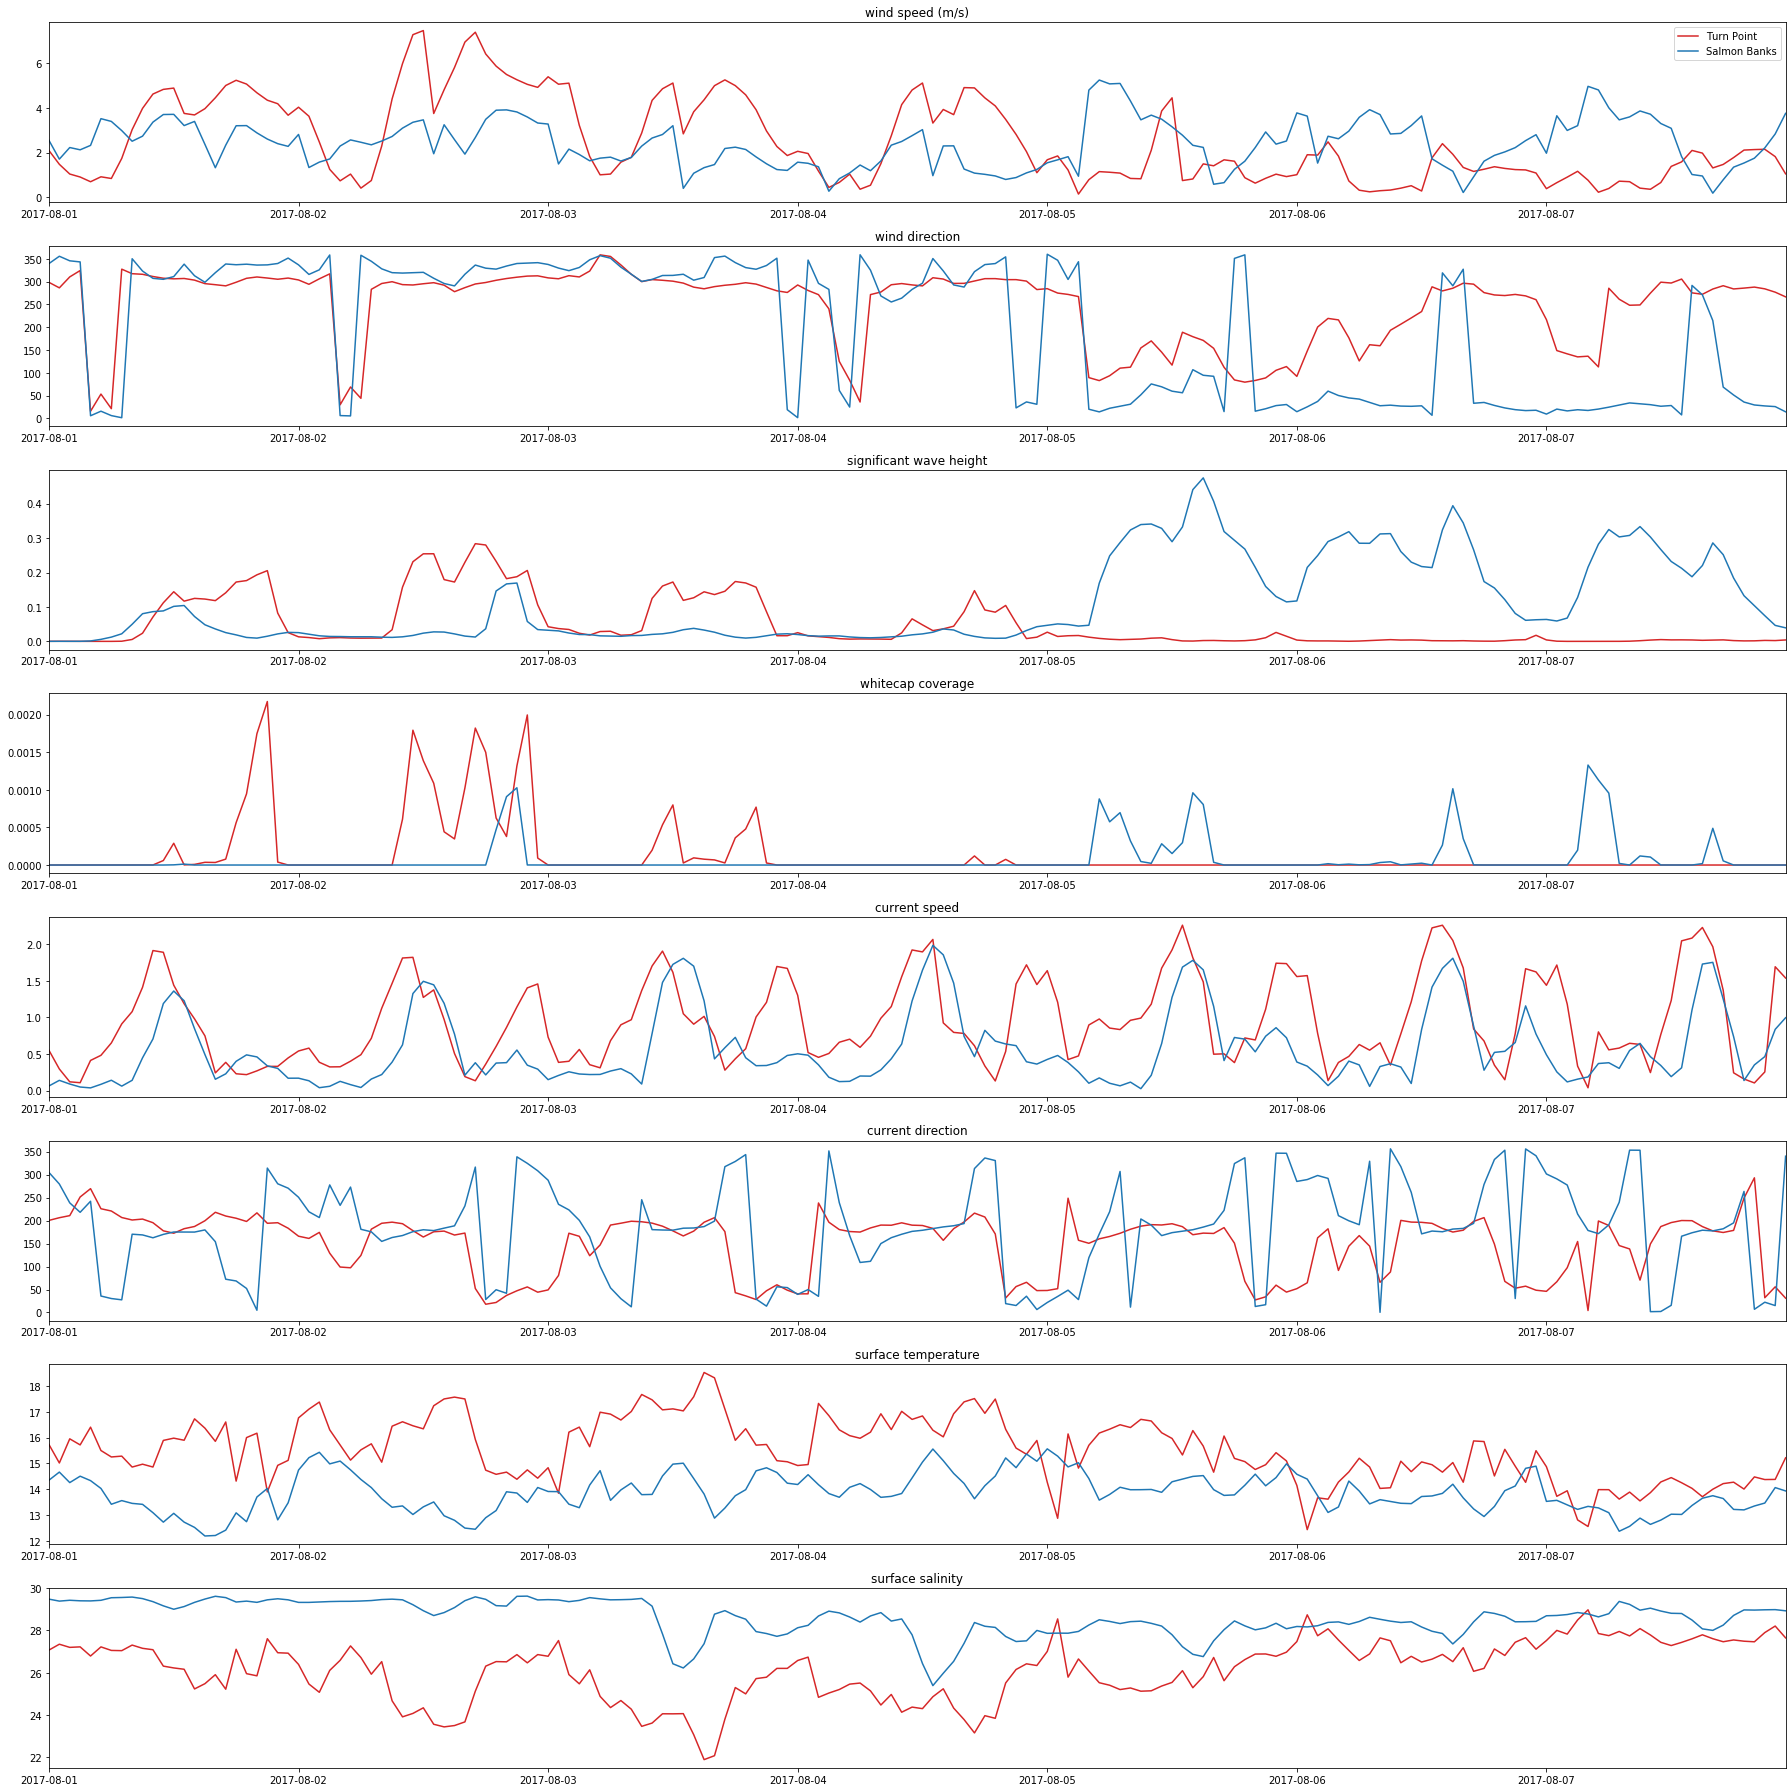

In [35]:
dates = [datetime.datetime(2017,8,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(8,1, figsize = (25,25))

color = 'tab:red'

ax1[0].set_title('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax1[1].set_title('wind direction')
ax1[1].plot(dates, tp_wind_dir[:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, sb_wind_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[2].set_title('significant wave height')
ax1[2].plot(dates, aug0117['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, aug0117['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[3].set_title('whitecap coverage')
ax1[3].plot(dates, aug0117['tp_wcc'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, aug0117['sb_wcc'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[4].set_title('current speed')
ax1[4].plot(dates, tp_curr_speed[:168], color=color, label = 'Turn Point')
ax1[4].plot(dates, sb_curr_speed[:168], color='tab:blue', label = 'Salmon Banks')

ax1[5].set_title('current direction')
ax1[5].plot(dates, tp_curr_dir[:168], color=color, label = 'Turn Point')
ax1[5].plot(dates, sb_curr_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[6].set_title('surface temperature')
ax1[6].plot(dates, aug0117['tp_tem'][:168], color=color, label = 'Turn Point')
ax1[6].plot(dates, aug0117['sb_tem'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[7].set_title('surface salinity')
ax1[7].plot(dates, aug0117['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[7].plot(dates, aug0117['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()
#fig.savefig('/home/vdo/Pictures/01aug17.png', dpi = 600)

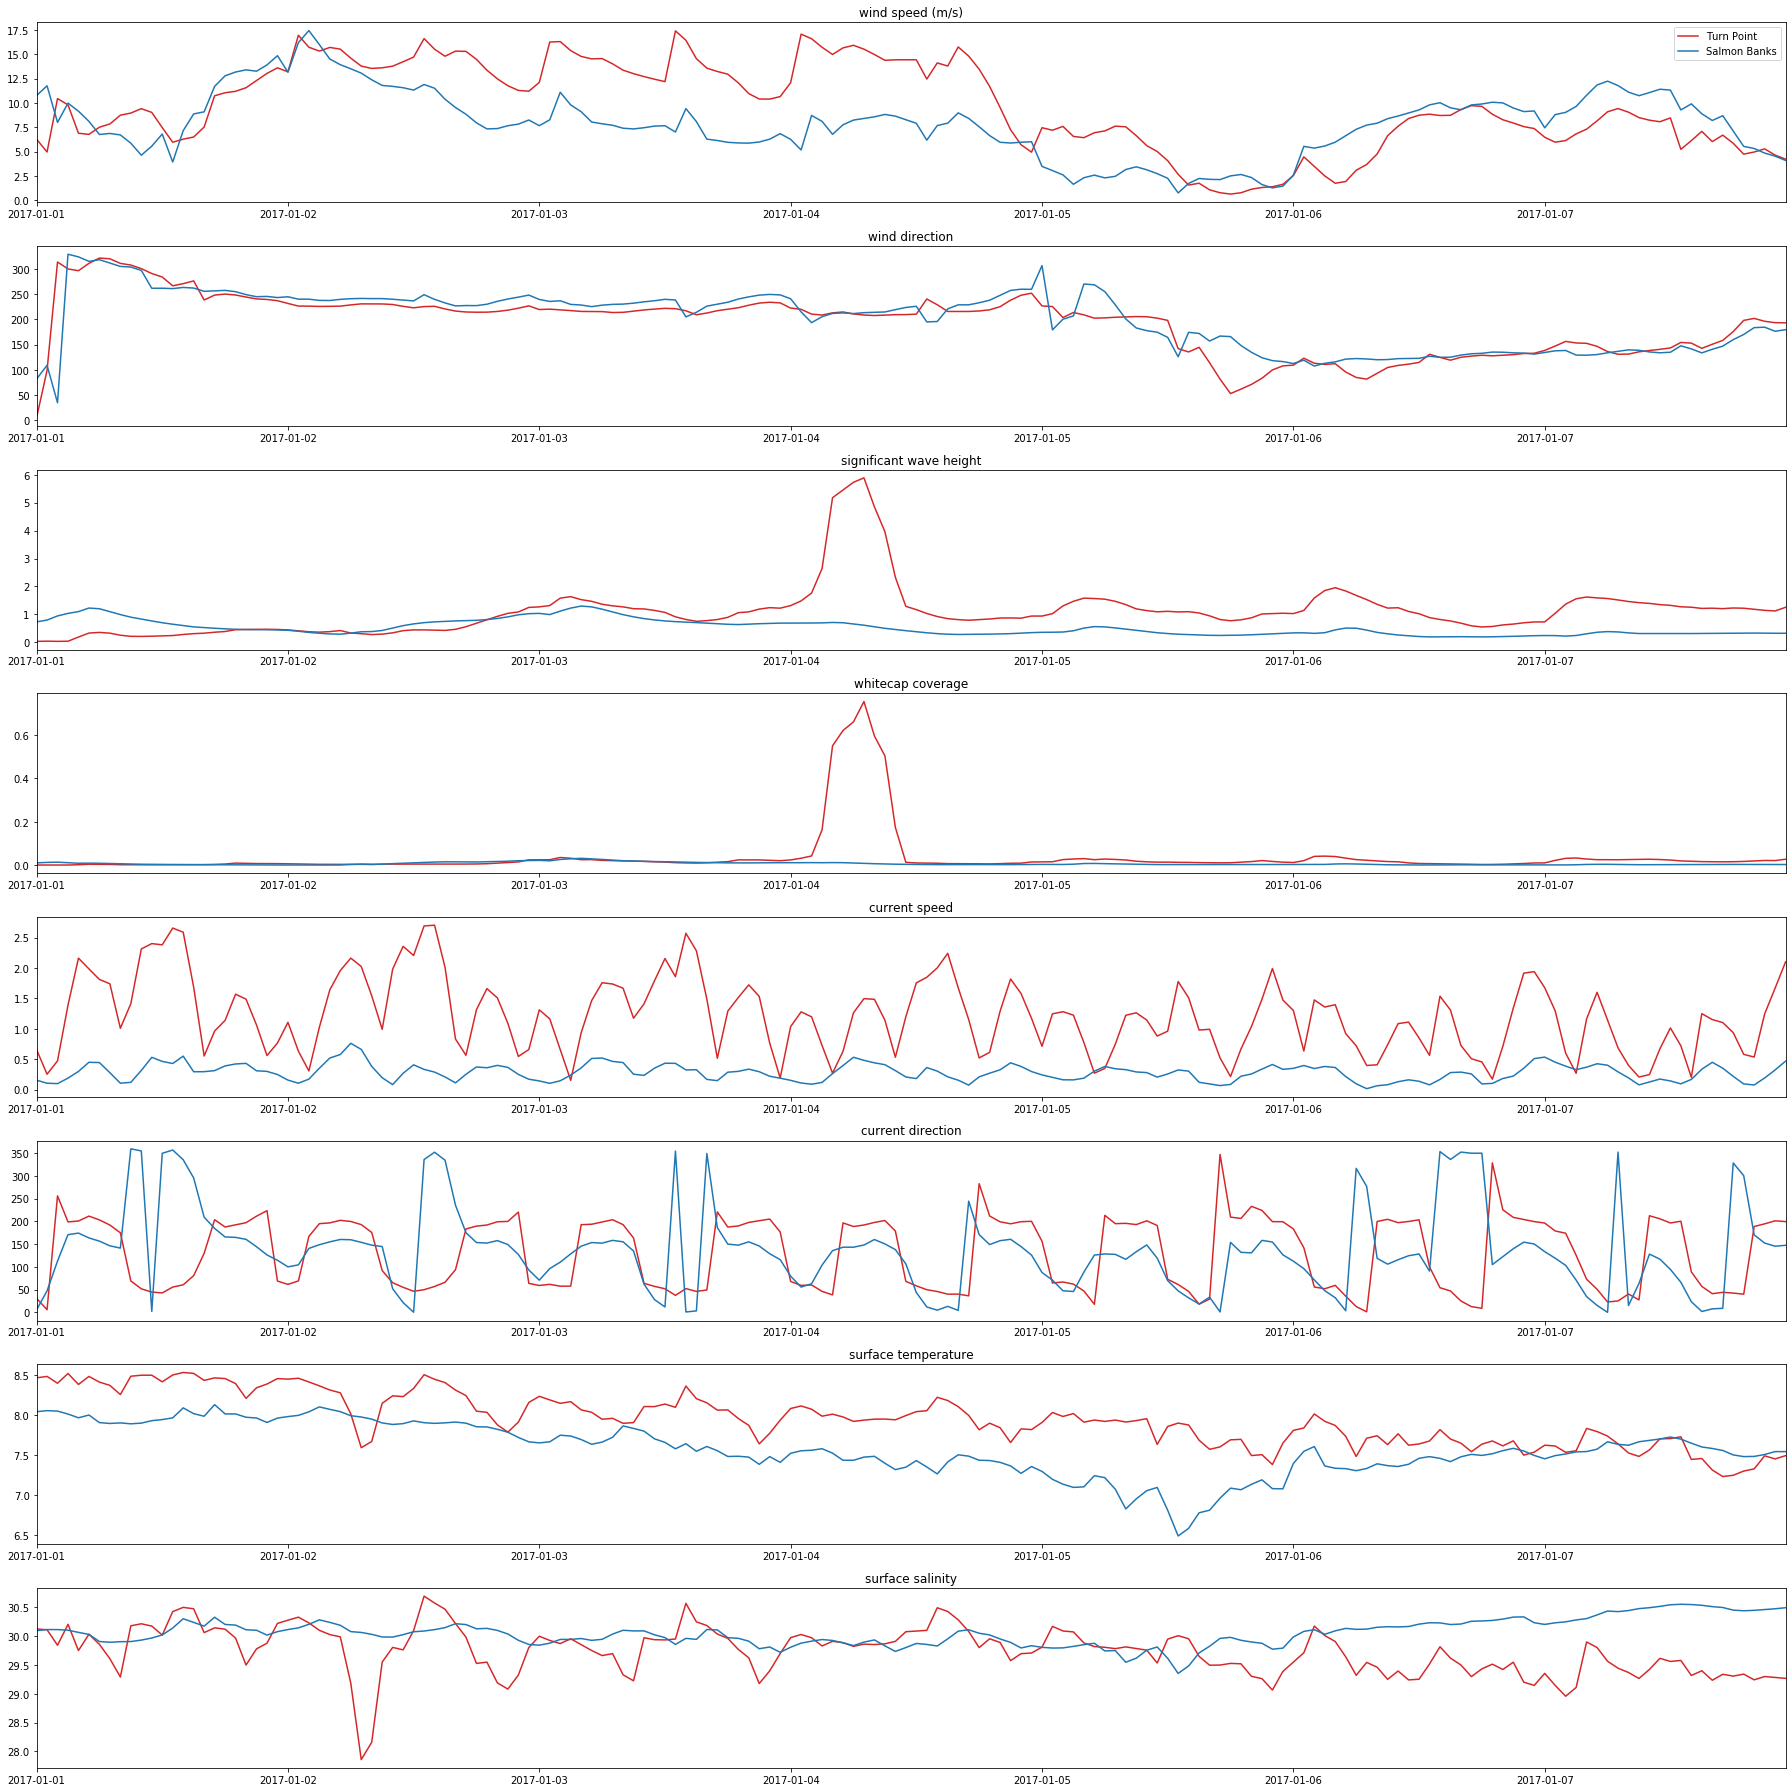

In [37]:
f = pickle.load(open('/ocean/vdo/MIDOSS/01jan17.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,1,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(8,1, figsize = (25,25))

color = 'tab:red'

ax1[0].set_title('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax1[1].set_title('wind direction')
ax1[1].plot(dates, tp_wind_dir[:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, sb_wind_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[2].set_title('significant wave height')
ax1[2].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[3].set_title('whitecap coverage')
ax1[3].plot(dates, f['tp_wcc'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_wcc'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[4].set_title('current speed')
ax1[4].plot(dates, tp_curr_speed[:168], color=color, label = 'Turn Point')
ax1[4].plot(dates, sb_curr_speed[:168], color='tab:blue', label = 'Salmon Banks')

ax1[5].set_title('current direction')
ax1[5].plot(dates, tp_curr_dir[:168], color=color, label = 'Turn Point')
ax1[5].plot(dates, sb_curr_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[6].set_title('surface temperature')
ax1[6].plot(dates, f['tp_tem'][:168], color=color, label = 'Turn Point')
ax1[6].plot(dates, f['sb_tem'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[7].set_title('surface salinity')
ax1[7].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[7].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()

#fig.savefig('/home/vdo/Pictures/01jan17.png', dpi = 600)

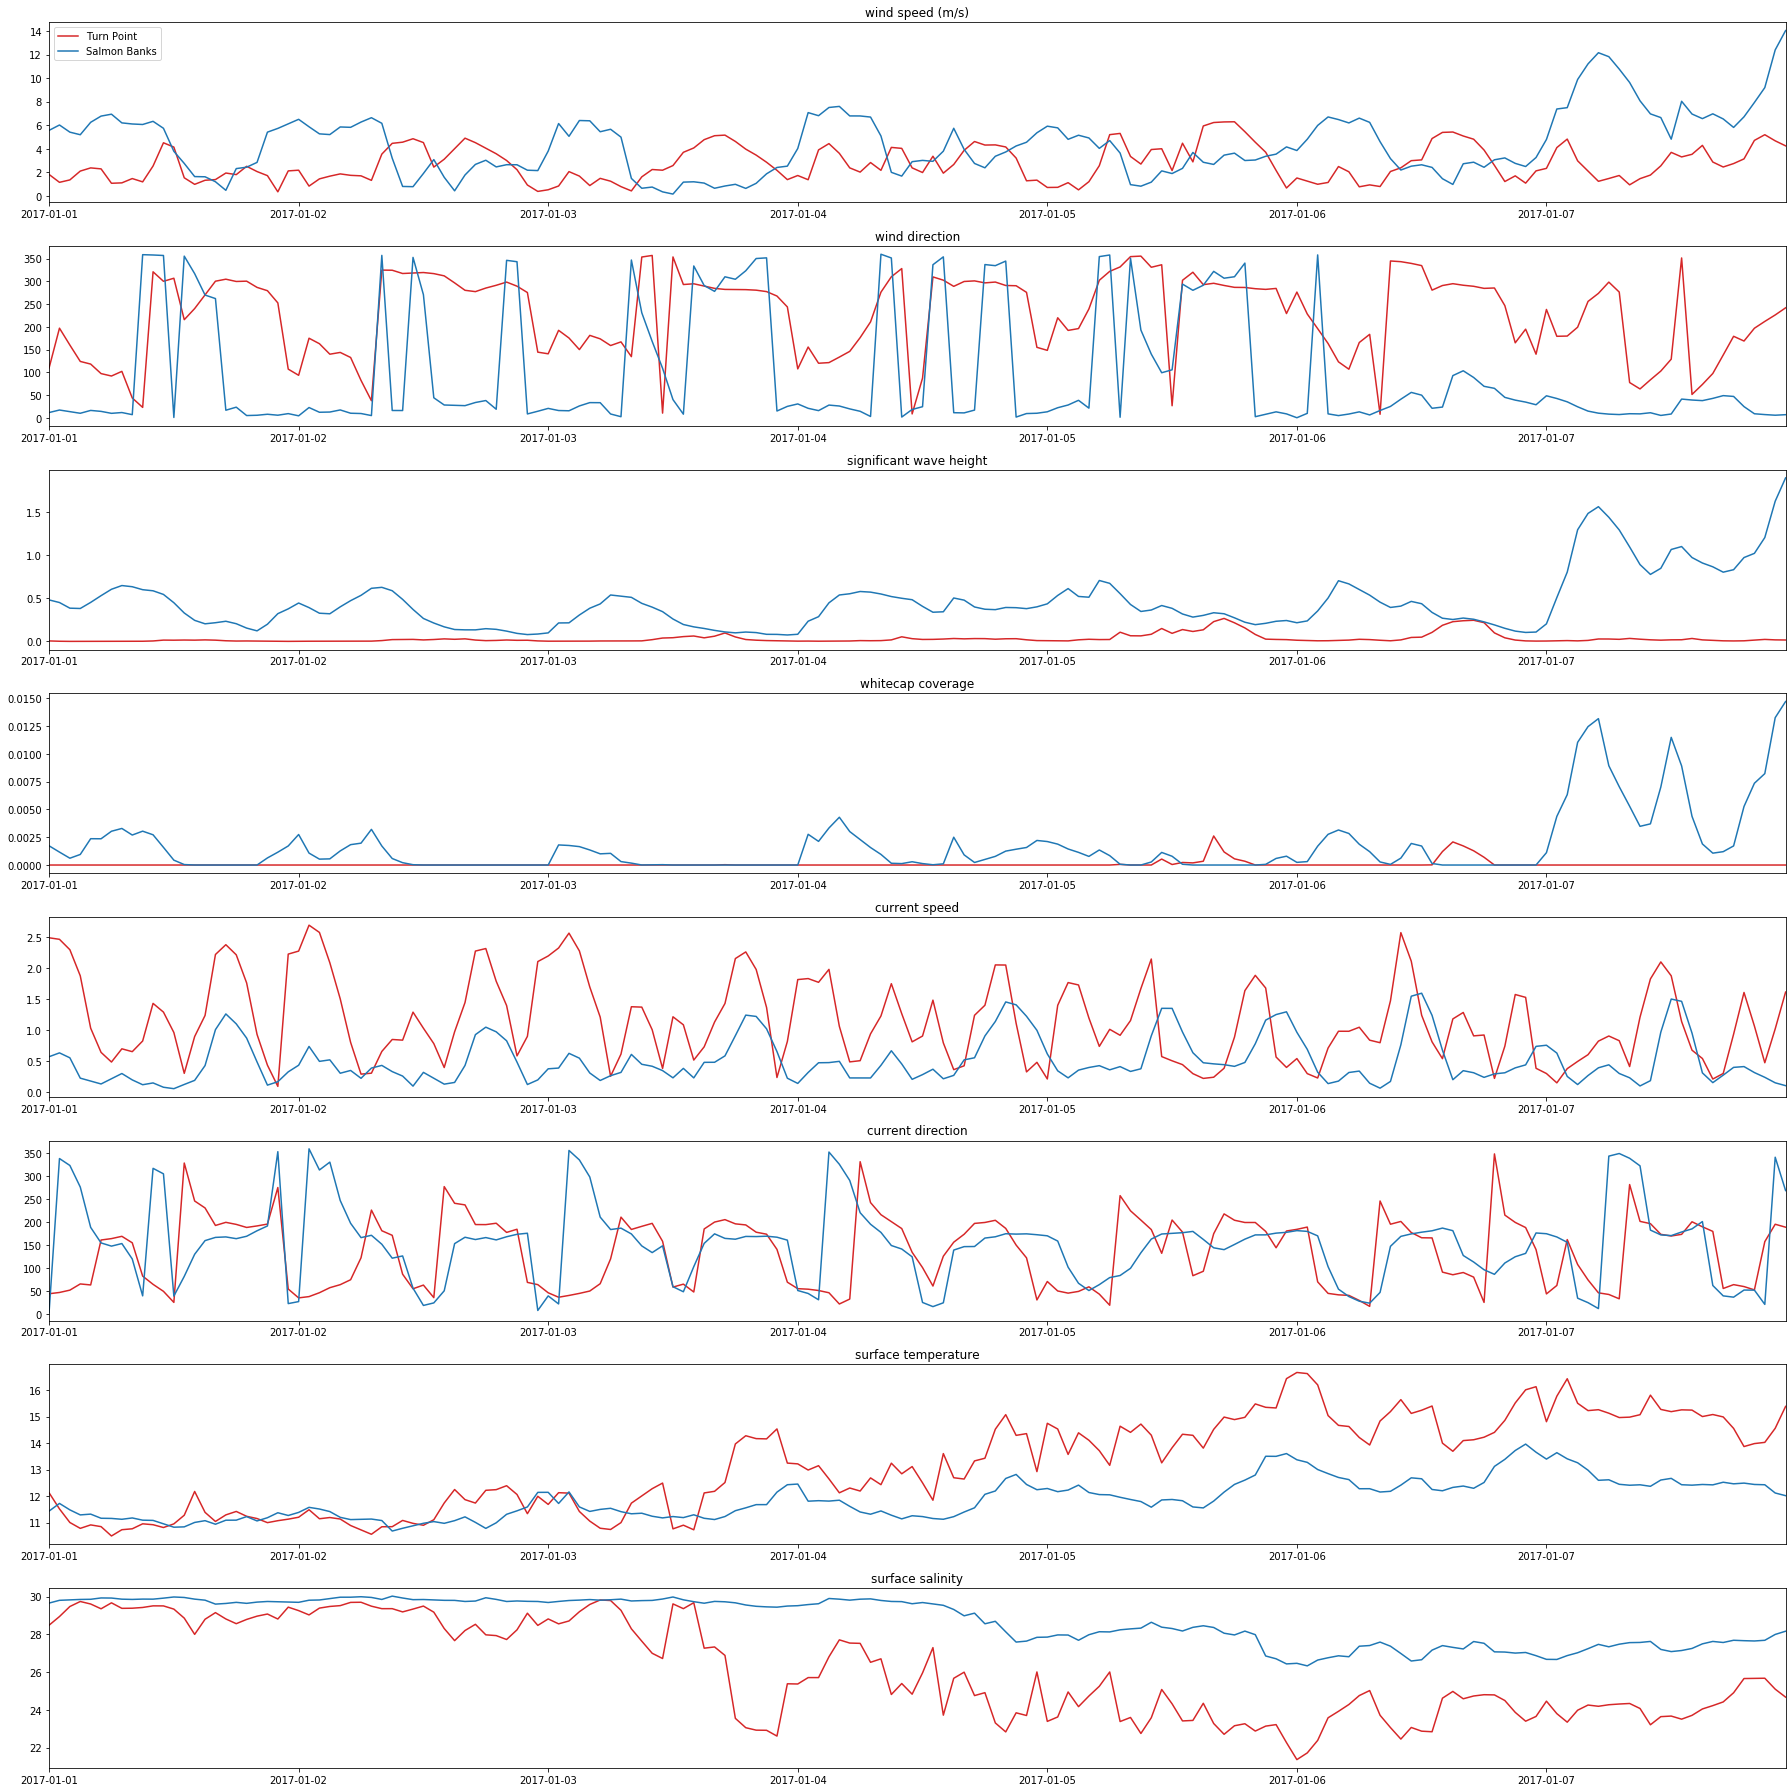

In [39]:
f = pickle.load(open('/ocean/vdo/MIDOSS/05jun15.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,1,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(8,1, figsize = (25,25))

color = 'tab:red'

ax1[0].set_title('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax1[1].set_title('wind direction')
ax1[1].plot(dates, tp_wind_dir[:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, sb_wind_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[2].set_title('significant wave height')
ax1[2].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[3].set_title('whitecap coverage')
ax1[3].plot(dates, f['tp_wcc'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_wcc'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[4].set_title('current speed')
ax1[4].plot(dates, tp_curr_speed[:168], color=color, label = 'Turn Point')
ax1[4].plot(dates, sb_curr_speed[:168], color='tab:blue', label = 'Salmon Banks')

ax1[5].set_title('current direction')
ax1[5].plot(dates, tp_curr_dir[:168], color=color, label = 'Turn Point')
ax1[5].plot(dates, sb_curr_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[6].set_title('surface temperature')
ax1[6].plot(dates, f['tp_tem'][:168], color=color, label = 'Turn Point')
ax1[6].plot(dates, f['sb_tem'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[7].set_title('surface salinity')
ax1[7].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[7].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()

#fig.savefig('/home/vdo/Pictures/05jun15.png', dpi = 600)

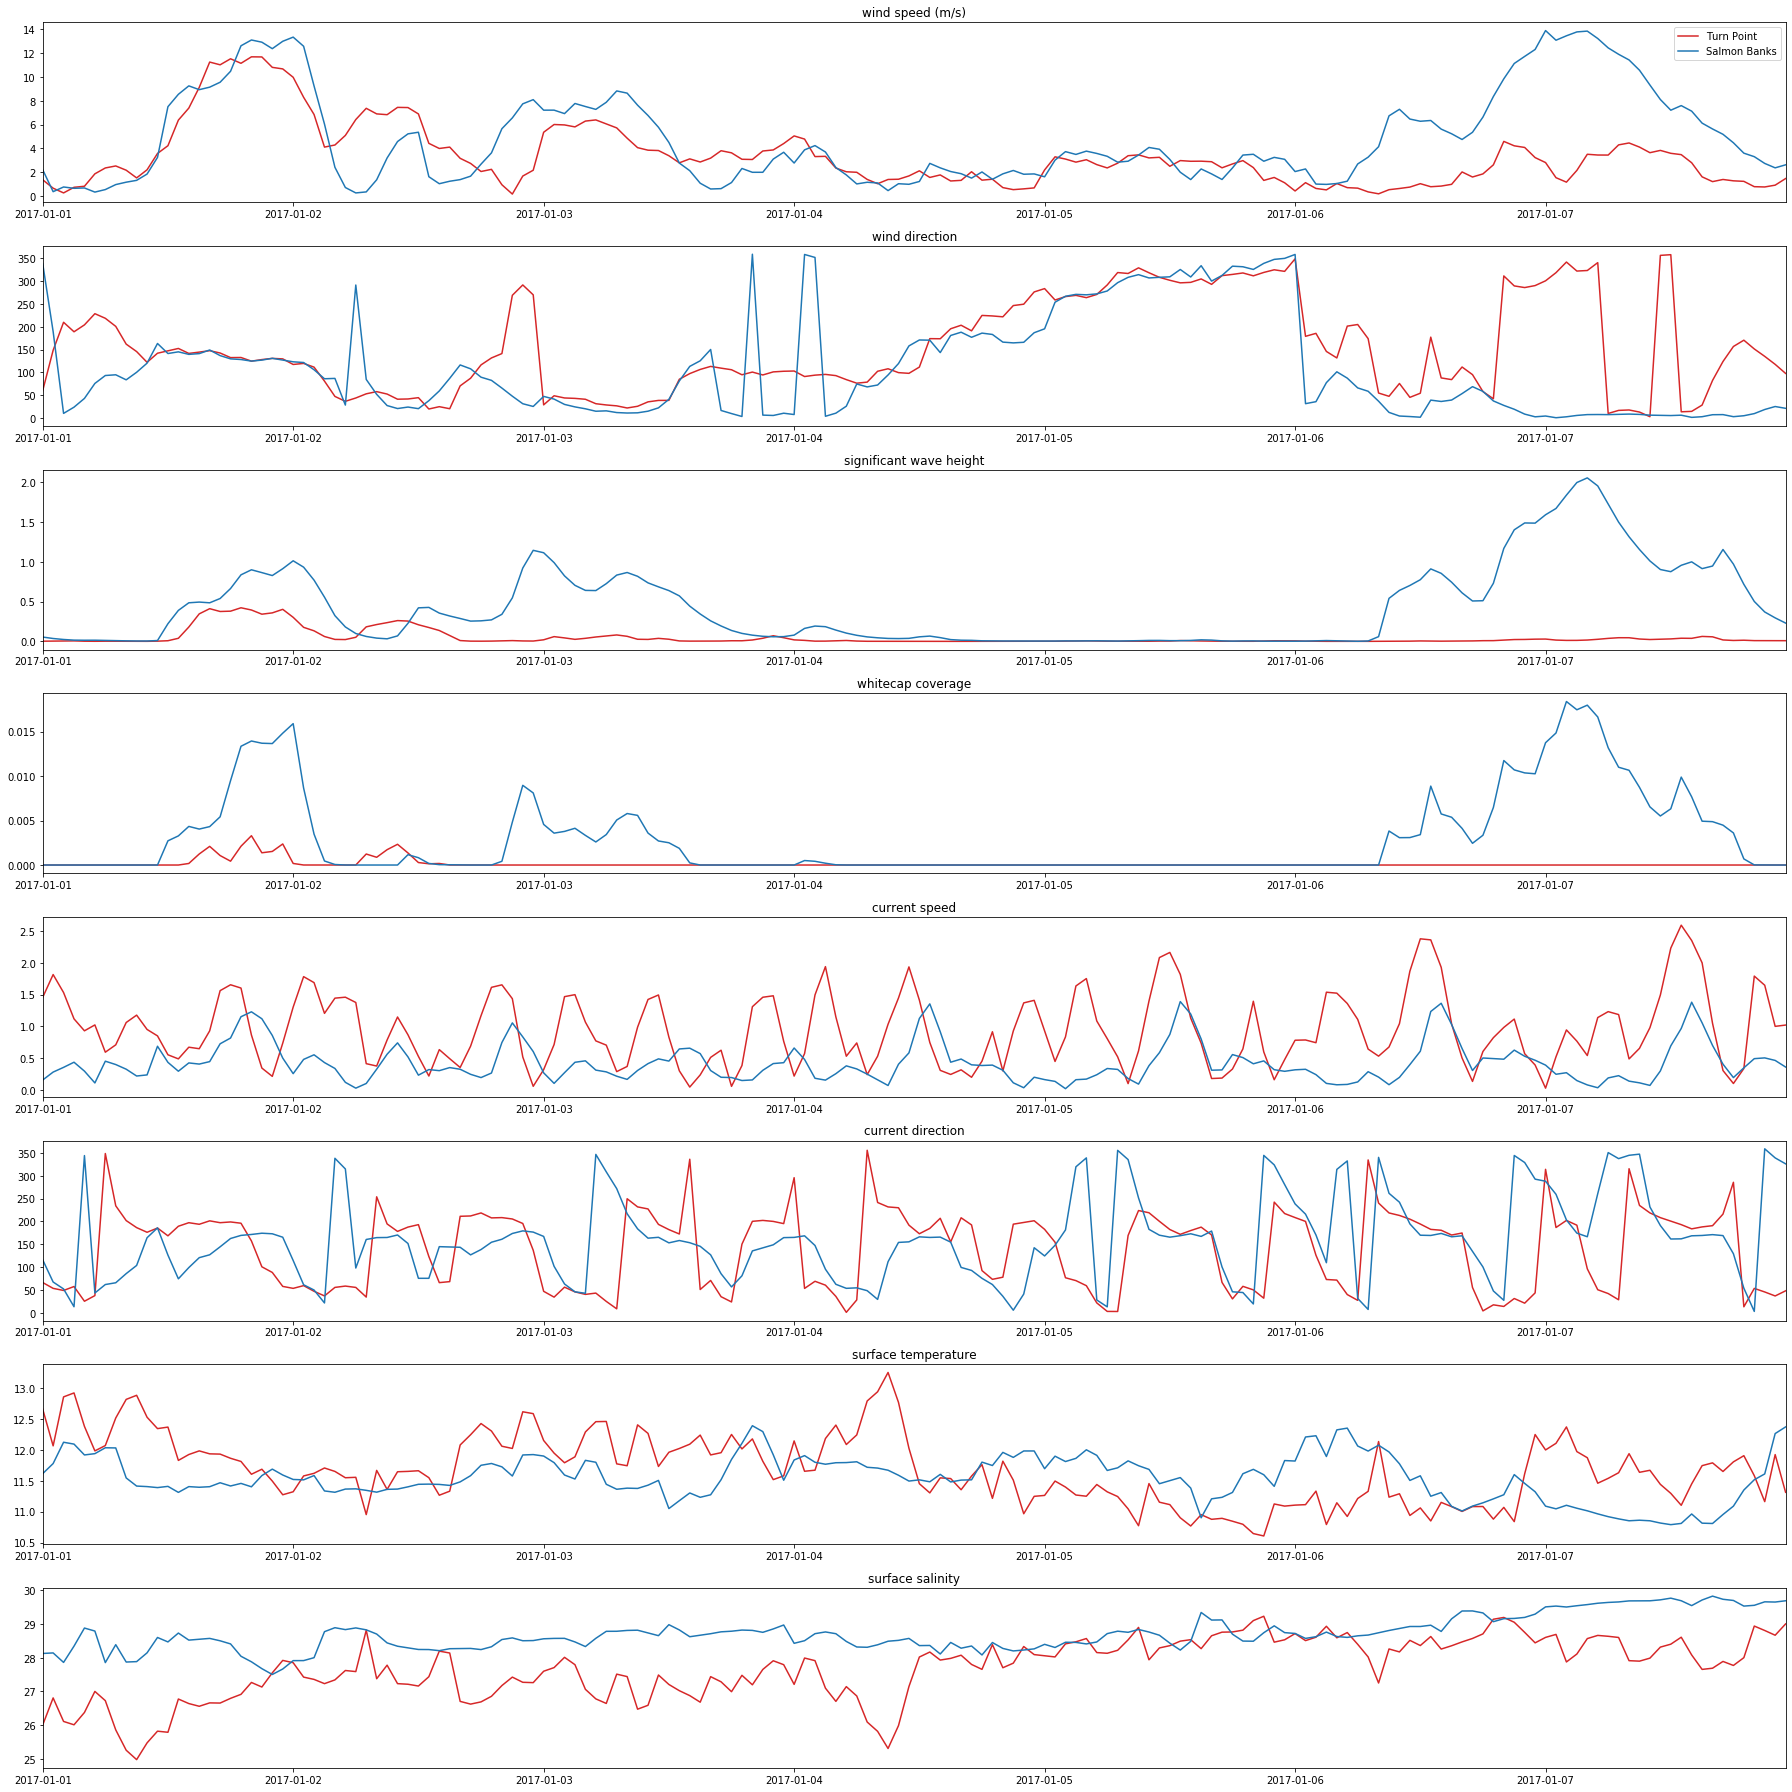

In [42]:
f = pickle.load(open('/ocean/vdo/MIDOSS/15jun17.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,1,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(8,1, figsize = (25,25))

color = 'tab:red'

ax1[0].set_title('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax1[1].set_title('wind direction')
ax1[1].plot(dates, tp_wind_dir[:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, sb_wind_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[2].set_title('significant wave height')
ax1[2].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[3].set_title('whitecap coverage')
ax1[3].plot(dates, f['tp_wcc'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_wcc'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[4].set_title('current speed')
ax1[4].plot(dates, tp_curr_speed[:168], color=color, label = 'Turn Point')
ax1[4].plot(dates, sb_curr_speed[:168], color='tab:blue', label = 'Salmon Banks')

ax1[5].set_title('current direction')
ax1[5].plot(dates, tp_curr_dir[:168], color=color, label = 'Turn Point')
ax1[5].plot(dates, sb_curr_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[6].set_title('surface temperature')
ax1[6].plot(dates, f['tp_tem'][:168], color=color, label = 'Turn Point')
ax1[6].plot(dates, f['sb_tem'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[7].set_title('surface salinity')
ax1[7].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[7].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()

#fig.savefig('/home/vdo/Pictures/15jun17.png', dpi = 600)

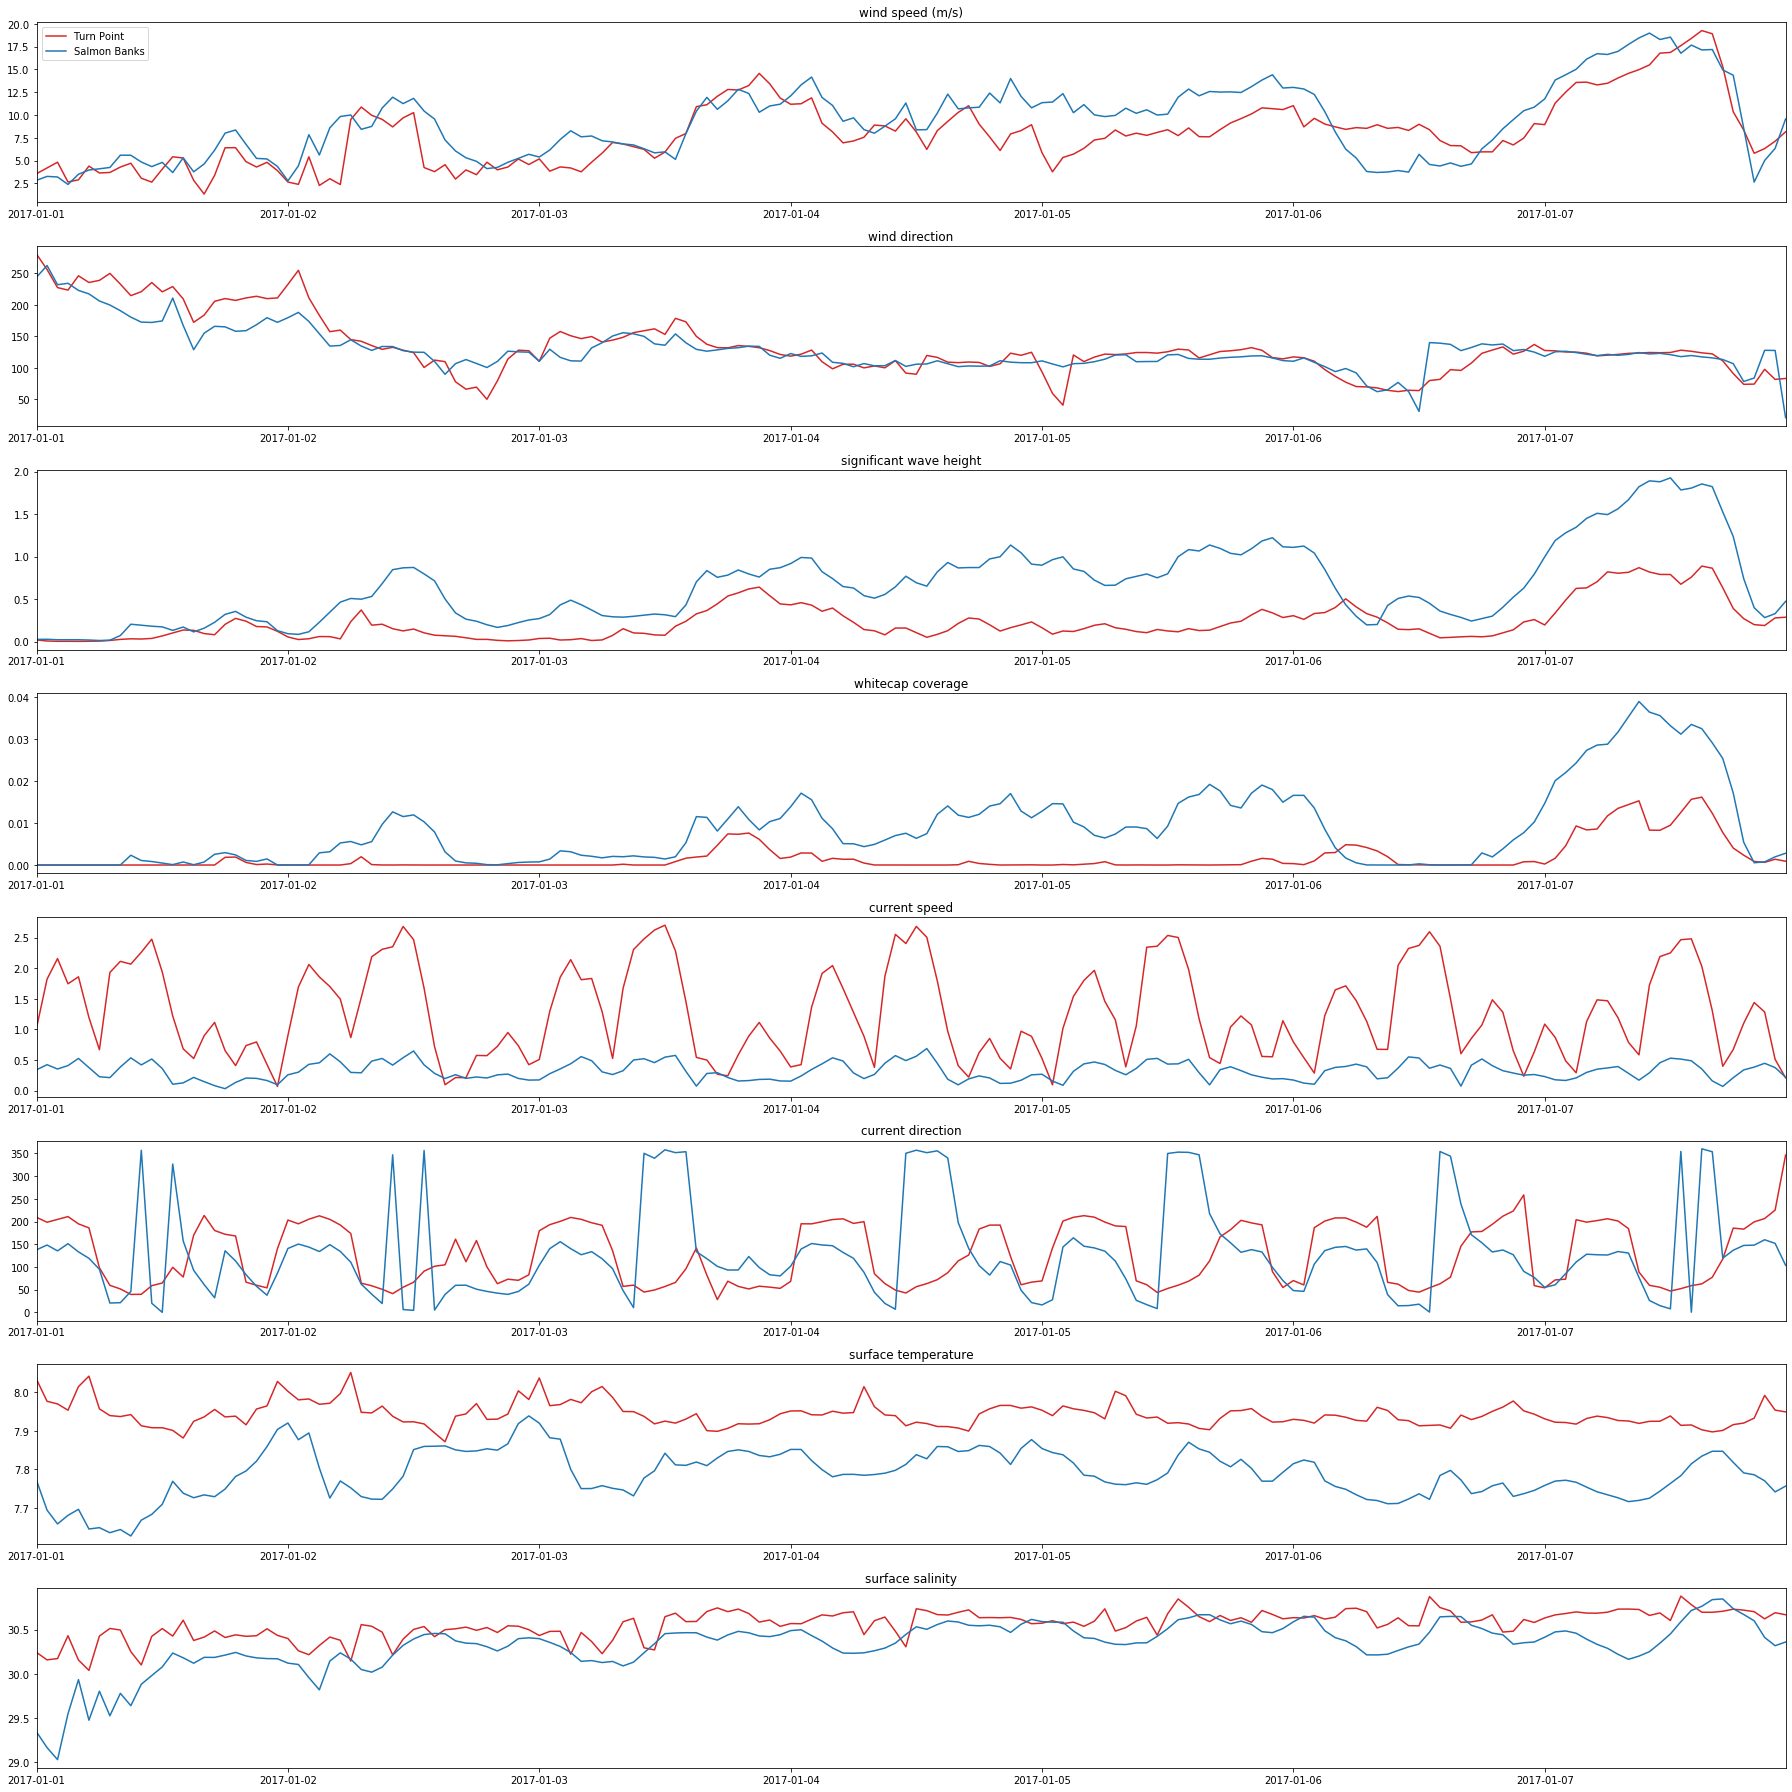

In [43]:
f = pickle.load(open('/ocean/vdo/MIDOSS/15jan18.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,1,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(8,1, figsize = (25,25))

color = 'tab:red'

ax1[0].set_title('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax1[1].set_title('wind direction')
ax1[1].plot(dates, tp_wind_dir[:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, sb_wind_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[2].set_title('significant wave height')
ax1[2].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[3].set_title('whitecap coverage')
ax1[3].plot(dates, f['tp_wcc'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_wcc'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[4].set_title('current speed')
ax1[4].plot(dates, tp_curr_speed[:168], color=color, label = 'Turn Point')
ax1[4].plot(dates, sb_curr_speed[:168], color='tab:blue', label = 'Salmon Banks')

ax1[5].set_title('current direction')
ax1[5].plot(dates, tp_curr_dir[:168], color=color, label = 'Turn Point')
ax1[5].plot(dates, sb_curr_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[6].set_title('surface temperature')
ax1[6].plot(dates, f['tp_tem'][:168], color=color, label = 'Turn Point')
ax1[6].plot(dates, f['sb_tem'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[7].set_title('surface salinity')
ax1[7].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[7].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()

#fig.savefig('/home/vdo/Pictures/15jan18.png', dpi = 600)

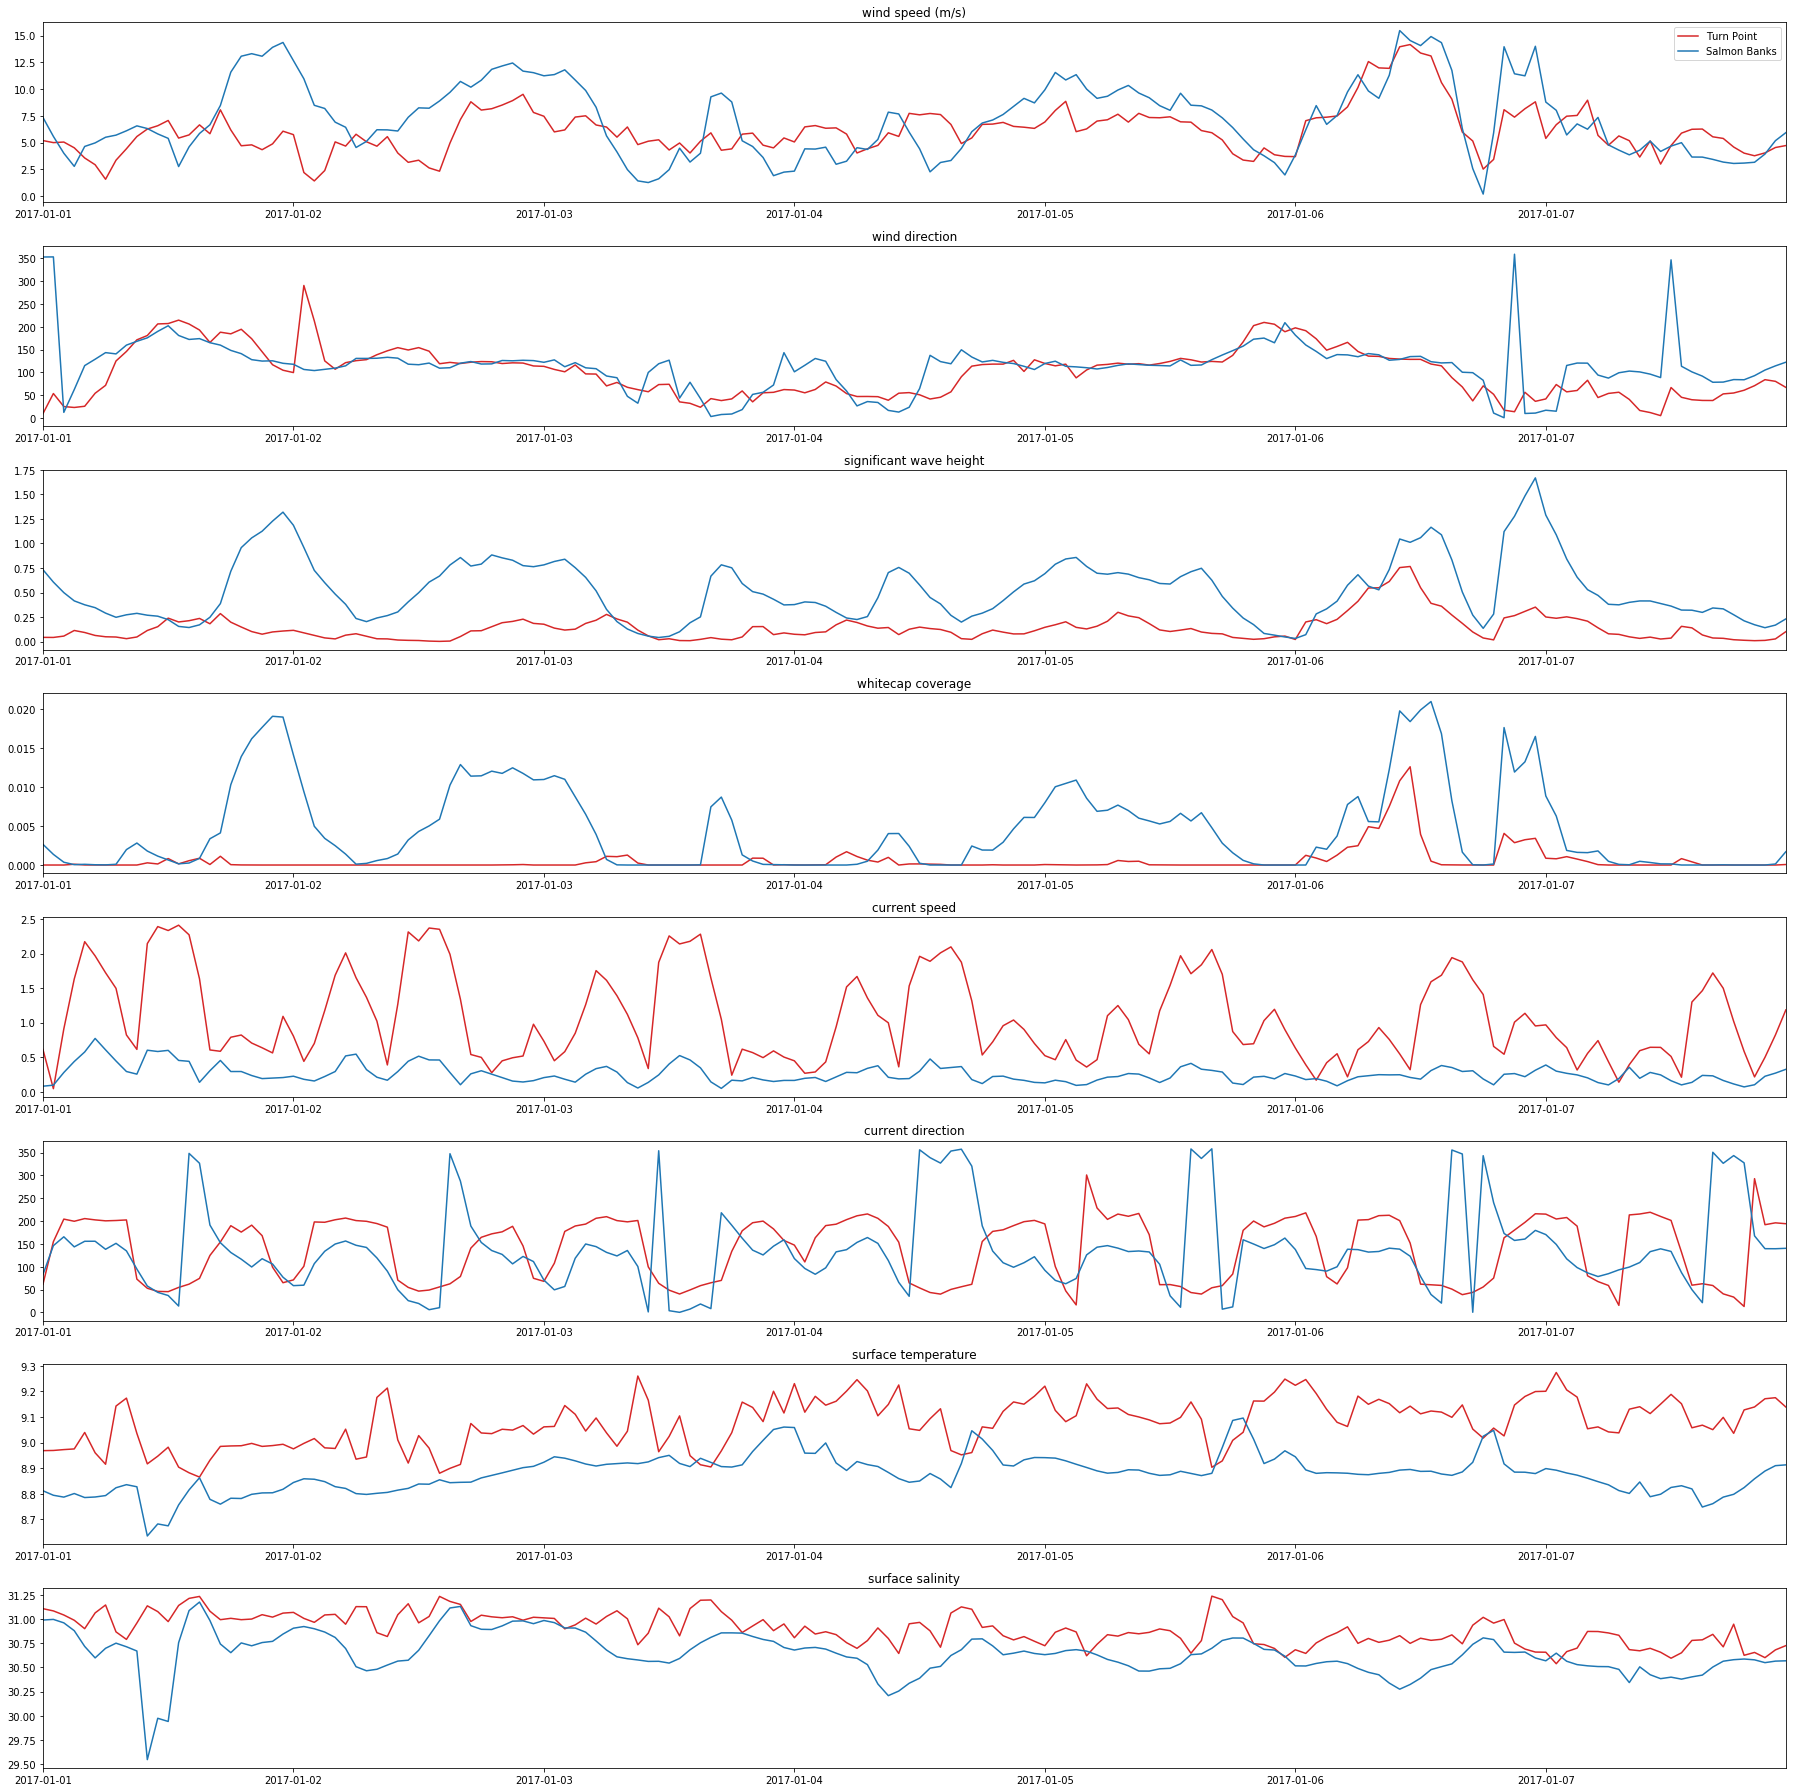

In [45]:
f = pickle.load(open('/ocean/vdo/MIDOSS/21nov17.pkl', 'rb'))

tp_wind_speed, tp_wind_dir = wind_tools.wind_speed_dir(f['tp_uwinds'], f['tp_vwinds'])
sb_wind_speed, sb_wind_dir = wind_tools.wind_speed_dir(f['sb_uwinds'], f['sb_vwinds'])

tp_curr_speed, tp_curr_dir = wind_tools.wind_speed_dir(f['tp_ucurr'], f['tp_vcurr'])
sb_curr_speed, sb_curr_dir = wind_tools.wind_speed_dir(f['sb_ucurr'], f['sb_vcurr'])

dates = [datetime.datetime(2017,1,1) + datetime.timedelta(hours = n) for n in range(168)]

fig, ax1 = plt.subplots(8,1, figsize = (25,25))

color = 'tab:red'

ax1[0].set_title('wind speed (m/s)')
ax1[0].plot(dates, tp_wind_speed[:168], color=color, label = 'Turn Point')
ax1[0].plot(dates, sb_wind_speed[:168], color='tab:blue', label = 'Salmon Banks')
ax1[0].legend()

ax1[1].set_title('wind direction')
ax1[1].plot(dates, tp_wind_dir[:168], color=color, label = 'Turn Point')
ax1[1].plot(dates, sb_wind_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[2].set_title('significant wave height')
ax1[2].plot(dates, f['tp_swh'][:168], color=color, label = 'Turn Point')
ax1[2].plot(dates, f['sb_swh'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[3].set_title('whitecap coverage')
ax1[3].plot(dates, f['tp_wcc'][:168], color=color, label = 'Turn Point')
ax1[3].plot(dates, f['sb_wcc'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[4].set_title('current speed')
ax1[4].plot(dates, tp_curr_speed[:168], color=color, label = 'Turn Point')
ax1[4].plot(dates, sb_curr_speed[:168], color='tab:blue', label = 'Salmon Banks')

ax1[5].set_title('current direction')
ax1[5].plot(dates, tp_curr_dir[:168], color=color, label = 'Turn Point')
ax1[5].plot(dates, sb_curr_dir[:168], color='tab:blue', label = 'Salmon Banks')

ax1[6].set_title('surface temperature')
ax1[6].plot(dates, f['tp_tem'][:168], color=color, label = 'Turn Point')
ax1[6].plot(dates, f['sb_tem'][:168], color='tab:blue', label = 'Salmon Banks')

ax1[7].set_title('surface salinity')
ax1[7].plot(dates, f['tp_sal'][:168], color=color, label = 'Turn Point')
ax1[7].plot(dates, f['sb_sal'][:168], color='tab:blue', label = 'Salmon Banks')

for a in ax1:
    a.set_xlim(dates[0], dates[-1])

fig.tight_layout()

#fig.savefig('/home/vdo/Pictures/21nov17.png', dpi = 600)